#HAM Silverstone one stop

In [ ]:
test_data = pd.read_csv('/content/HAM_2019_Silverstone.csv')
no_laps = 53

In [ ]:
X_testing = test_data[['race_progress', 'remaining_pit_stops', 'location', 'change_compound', 'number_of_available_compounds']]
y_testing = test_data['relativecompound']

In [ ]:
X_testing

,race_progress,remaining_pit_stops,location,change_compound,number_of_available_compounds
0,0.000000,2,Suzuka,False,3
1,0.019274,2,Suzuka,False,3
2,0.038553,2,Suzuka,False,3
3,0.057750,2,Suzuka,False,3
4,0.077009,2,Suzuka,False,3
5,0.096244,2,Suzuka,False,3
6,0.115471,2,Suzuka,False,3
7,0.134765,2,Suzuka,False,3
8,0.154113,2,Suzuka,False,3
9,0.173403,2,Suzuka,False,3


In [ ]:
# Separate categorical and numerical features
cat_features = ['remaining_pit_stops', 'location', 'change_compound', 'number_of_available_compounds']
num_features = ['race_progress']

In [ ]:
from joblib import load
# Load the saved models
scaler = load('scaler.joblib')
encoder = load('encoder.joblib')
label_encoder = load('label_encoder.joblib')

In [ ]:
X_test_encoded = encoder.transform(X_testing[cat_features])
X_testing[num_features] = scaler.transform(X_testing[num_features])

X_test_processed = np.concatenate((X_test_encoded, X_testing[num_features]), axis=1)

<ipython-input-24-53b63277eeed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testing[num_features] = scaler.transform(X_testing[num_features])


In [ ]:
label_encoder = load('label_encoder.joblib')

predicted_list = []

for i in range(no_laps):
  X_test_process = X_test_processed[i].reshape(1,31)
  predicted_compound_encoded = model.predict(X_test_process)
  predicted_compound = np.argmax(predicted_compound_encoded, axis=1)
  predicted_compound_label = label_encoder.inverse_transform(predicted_compound)
  predicted_list.append(predicted_compound_label[0])

1/1 [==============================] - 0s 22ms/step


In [ ]:
column_to_list = test_data['relativecompound'].tolist()

In [ ]:
# Mapping dictionary
compound_mapping = {'soft': 1, 'medium': 2, 'hard': 3}

# Convert list
pred_converted_list = [compound_mapping[compound] for compound in predicted_list]
actual_converted_list = [compound_mapping[compound] for compound in column_to_list]

In [ ]:
len(pred_converted_list)

53

In [ ]:
len(actual_converted_list)

53

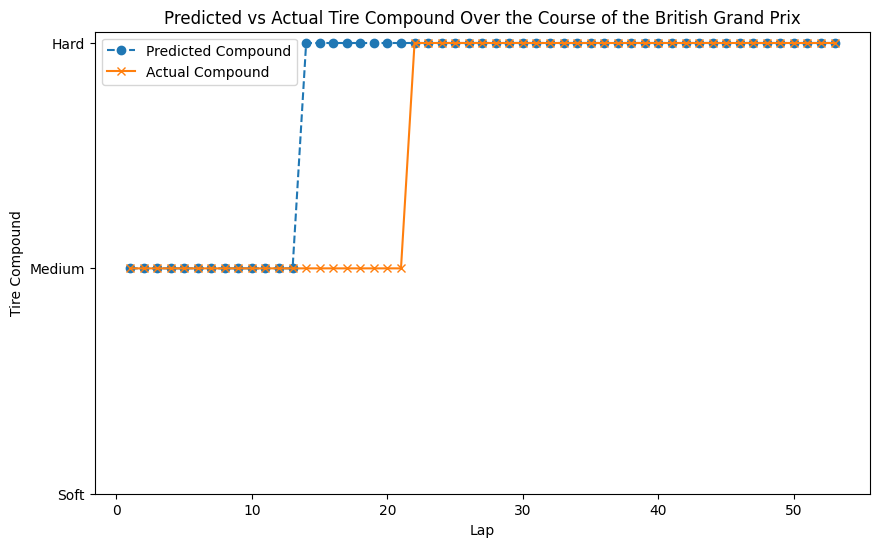

In [ ]:
laps = list(range(1, no_laps+1))  # Assuming a 60-lap race

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(laps, pred_converted_list, label='Predicted Compound', linestyle='--', marker='o')
plt.plot(laps, actual_converted_list, label='Actual Compound', linestyle='-', marker='x')


# Adding title and labels
plt.title('Predicted vs Actual Tire Compound Over the Course of the British Grand Prix')
plt.xlabel('Lap')
plt.ylabel('Tire Compound')
#plt.xticks(range(0, 61, 5))  # Adjusting x-axis ticks for better readability
plt.yticks([1, 2, 3], ['Soft', 'Medium', 'Hard'])  # Mapping numerical codes back to compound types

# Adding legend
plt.legend()

# Show plot
plt.show()